# Prototype filter
[Prototype filter](https://en.wikipedia.org/wiki/Prototype_filter) is a nondimentionalized design concept that's suitable for electronics filter design, from which the desired filter can be scaled and transformed. The [wiki page](https://en.wikipedia.org/wiki/Prototype_filter) and [this article](https://wiraelectrical.com/magnitude-and-frequency-scaling/) gives instruction on how to do magnitude scaling or frequency scaling.
- **Magnitude scaling** is the process of increasing all impedance in a network by a factor, the frequency response remaining unchanged.
- **Frequency scaling** is the process of shifting the frequency response of a network up or down the frequency axis while leaving the impedance the same.

If apply both magnitude and frequency scaling at the same time with 2 scaling factors applied to $R$, $L$, $C$ and $\omega$. The general formulas are like below,

$$\begin{align}
R' &= K_m R \\
L' &= \dfrac{K_m}{K_f} L \\
C' &= \dfrac{1}{K_m K_f} C \\
\omega' &= K_f \omega
\end{align}$$

# Standard filter transfer function

## The standard 2nd order low pass filter format

The standard form transfer function of 2nd order low pass filter with unity gain at DC is,

$$\begin{align}
H(s) &= \dfrac{\omega_0^2}{s^2 + 2 \zeta \omega_0 s + \omega_0^2} \\
    &= \dfrac{\omega_0^2}{s^2 + \dfrac{ \omega_0}{Q} s + \omega_0^2} \\
    &= \dfrac{1}{\left(\dfrac{s}{\omega_0}\right)^2 + \dfrac{1}{Q} \dfrac{s}{\omega_0} + 1}\\
\end{align}$$

Define frequency scale factor ($FSF$) as the ratio of natural frequency $\omega_0$ and cutoff frequency $\omega_c$.

$$\lambda = \dfrac{\omega_0}{\omega_c}$$

The standard form of 2nd order low pass filter with unity gain,
$$H(s) = \dfrac{1}{\left(\dfrac{s}{\lambda \omega_c}\right)^2 + \dfrac{1}{Q} \dfrac{s}{\lambda \omega_c} + 1}$$

# Unity gain Sallen-key low-pass filter
A unity gain Sallen-key low-pass filter circuit config is shown below,

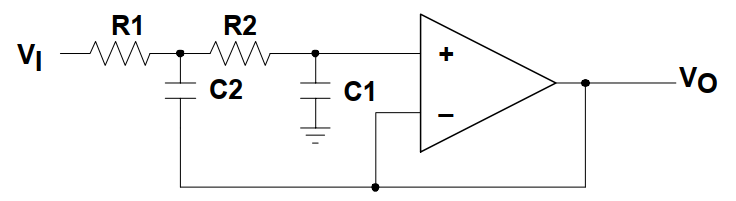

The transfer functions of the filter is,
$$H(S) = \dfrac{\dfrac{1}{R_1\cdot R_2 \cdot C_1 \cdot C_2}}{s^2 + s\dfrac{1}{C_2}\left(\dfrac{1}{R_1}+\dfrac{1}{R_2}\right) + \dfrac{1}{R_1\cdot R_2 \cdot C_1 \cdot C_2}}$$

Rewrite it,

$$H(s) = \dfrac{a_0}{s^2+a_1 s + a_0}$$
where,

$$a_1 = \dfrac{1}{C_2}\left(\dfrac{1}{R_1}+\dfrac{1}{R_2}\right)$$,
$$a_0 = \dfrac{1}{R_1\cdot R_2 \cdot C_1 \cdot C_2}$$


The Sallen-key low-pass filter in standard form has below relationship,
$$\omega_0 = \dfrac{1}{\sqrt{R_1\cdot R_2 \cdot C_1 \cdot C_2}}$$

$$\zeta = \dfrac{a_1}{2 \omega_0} = \dfrac{\dfrac{1}{C_2}\left(\dfrac{1}{R_1}+\dfrac{1}{R_2}\right)}{2 \omega_0}$$

$$Q=\dfrac{1}{2\zeta} = \dfrac{\omega_0}{\dfrac{1}{C_2}\left(\dfrac{1}{R_1}+\dfrac{1}{R_2}\right)} = \dfrac{\sqrt{R_1\cdot R_2 \cdot C_1 \cdot C_2}}{\left(R_1 + R_2\right) C_1}$$

# Unity gain Multi-Feedback (MFB) low-pass filter

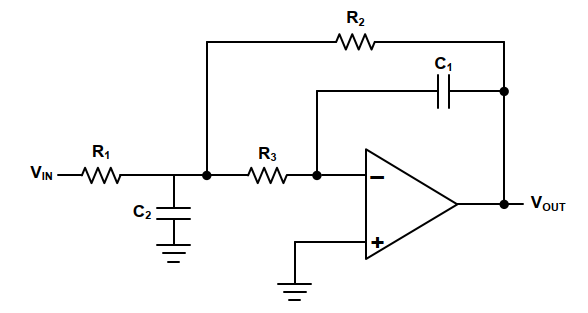

The transfer functions of the filter is,
$$\begin{align}
H(s) &= \dfrac{-\dfrac{R_2}{R_1} \dfrac{1}{R_2 R_3 C_1 C_2}}{s^2 + s \dfrac{R_3 C_1 + R_2 C_1 + \dfrac{R_2 R_3 C_1}{R_1}}{R_2 R_3 C_1 C_2} + \dfrac{1}{R_2 R_3 C_1 C_2}}
\\&= \frac {K{\omega _{0}}^{2}}{s^{2}+{\frac {\omega _{0}}{Q}}s+{\omega _{0}}^{2}}\end{align}$$

where,
$$ K = -\dfrac{R_2}{R_1}$$
$$ \omega_0 = \dfrac{1}{\sqrt{R_2 R_3 C_1 C_2}}$$
$$ \zeta = \dfrac{1}{2}\omega_0 C_1 \left(R_3 + R_2 + \dfrac{R_2 R_3}{R_1}\right)$$
$$ Q = \dfrac{1}{2\zeta} = \dfrac{1}{\omega_0 C_1 \left(R_3 + R_2 - K R_3\right)}$$


# Filter table
[TI appnote sloa049d](https://www.ti.com/lit/SLOA049) gives the filter tables that help determines the components values. The tables are arranged so that increasing Q is associated with increasing stage order to prevent signal clipping.

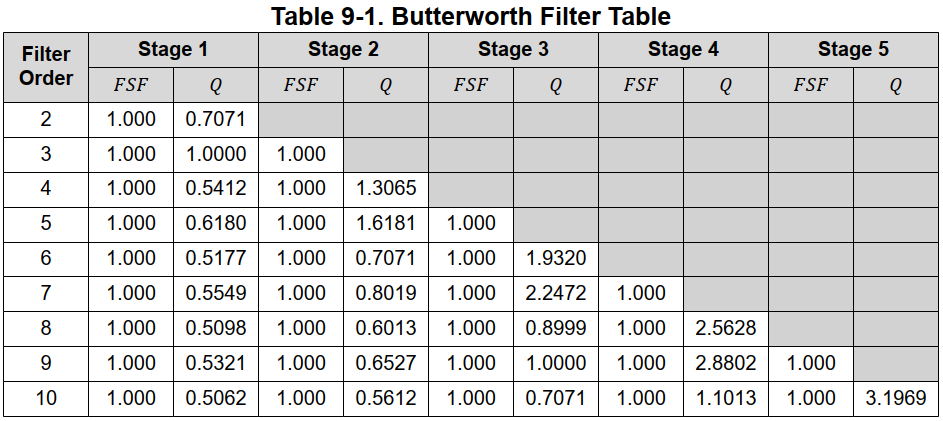

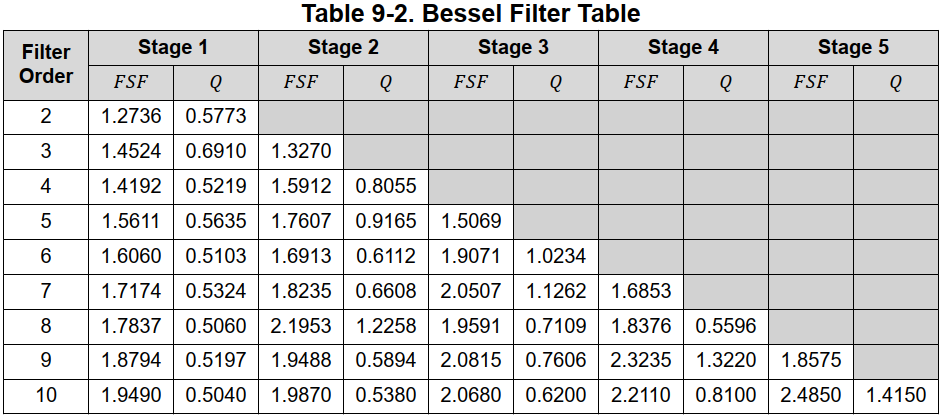

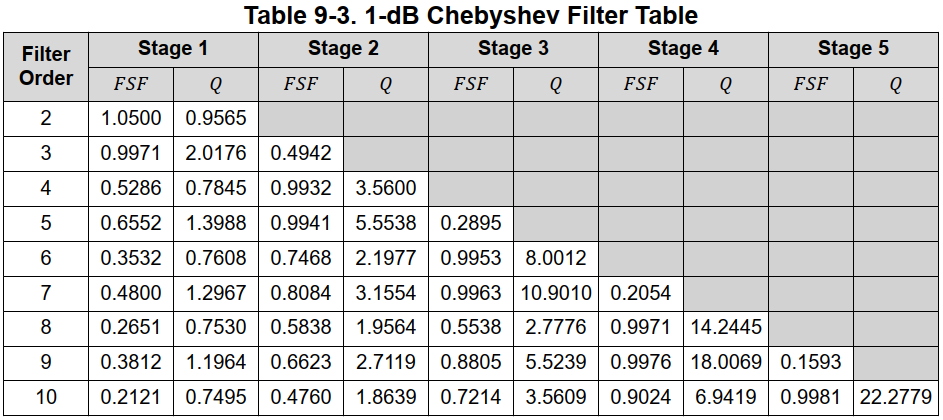

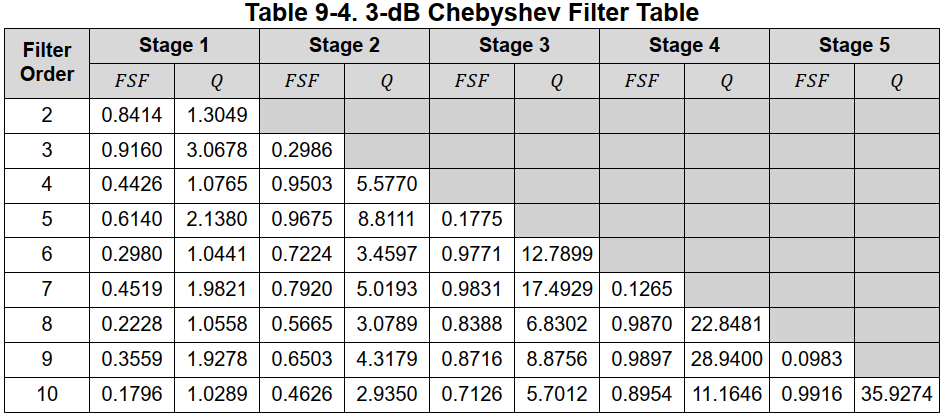

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import math

from scipy.optimize import fsolve

# Second order Sallen-key filter design examples

## Step 1: select fsf and qualify factor
Select fsf and qualify factor as per values in filter table according to the filter orders and type chosen.

In [2]:
fc = 1
fsf = 1
Q = 0.7071
zeta = 1/2/Q

## Step 2: design using prototype filter concept
To resolve the equation, two parameter should be pre-determined. C1 and C2 to be preset with below equations constraint (they are equivalent),
$$\dfrac{C_1}{C_2} \leq \zeta^2$$
$$\dfrac{C_2}{C_1} \geq 4Q^2$$

To design in non-dimentionalized space, set $C_1=1$, and C2 accordingly.

In [3]:
print(zeta**2, 4*(Q**2))
C1 = 1
C2 = 1.65 * C1/(zeta**2)
print(C1, C2)

0.5000095901839398 1.9999616399999998
1 3.2999367059999996


## Step 3: resolve components values of the prototype filter
Build non-linear equations using FSF and qualify factor from the filter table, and resolve the remaining unknown parameters using fsolve() function.

In [4]:
def butterworth(p):
  R1, R2 = p
  return (2*math.pi*fsf*fc * math.sqrt(R1*R2*C1*C2) - 1,
           Q*(R2 + R1)*C1- math.sqrt(R1*R2*C1*C2))

R1, R2 = fsolve(butterworth, (0.1, 0.5))

print(R1, R2)

0.04190495919531784 0.18317627838337733


## Step 4: frequency and magnitude scaling
* Frequency scaling factor is determined by the real design cutoff frequency target.
* Magnitude scaling factor could be chosen more freely, the rule is to choose is so that the resistance and capacitance are within a resonable range. For example, the resistance between $1k\Omega$ to $50k\Omega$ for low bandwidth filter (<50kHz), or resistance of a few hundreds to a few thousands ohms for higher cutoff frequency applications.

The capacitors $C_1$ and $C_2$ impedance near cutoff frequency are on the same order as the resistors $R_1$ and $R_2$. 1% tolerance or better components are preferred. Surface mount is preferred.


In [5]:
fc_target = 1e3
kf = fc/fc_target

km = 10/1e6

C1 = km*kf*C1
C2 = km*kf*C2
R1 = R1/km
R2 = R2/km

print(f'\nR1={R1}\nR2={R2}\nC1={C1}\nC2={C2}')


R1=4190.495919531783
R2=18317.627838337732
C1=1e-08
C2=3.2999367059999993e-08


## Choose another set of parameters with same butterworth specification for comparison

In [6]:
# step 1
fc = 1
fsf = 1
Q = 0.7071
zeta = 1/2/Q

# step 2
print(zeta**2, 4*(Q**2))
C1 = 1
C2 = C1/(zeta**2)
print(C1, C2)

# step 3
R1, R2 = fsolve(butterworth, (0.1, 0.5))
print(R1, R2)

# step 4
fc_target = 1e3
kf = fc/fc_target

km = 10/1e6

C1 = km*kf*C1
C2 = km*kf*C2
R1 = R1/km
R2 = R2/km

print(f'\nR1={R1}\nR2={R2}\nC1={C1}\nC2={C2}')

0.5000095901839398 1.9999616399999998
1 1.99996164
0.11254061603469338 0.11254062154400181

R1=11254.061603469338
R2=11254.06215440018
C1=1e-08
C2=1.99996164e-08


The 2 sets seems very different parameters yield almost identical filtering response.
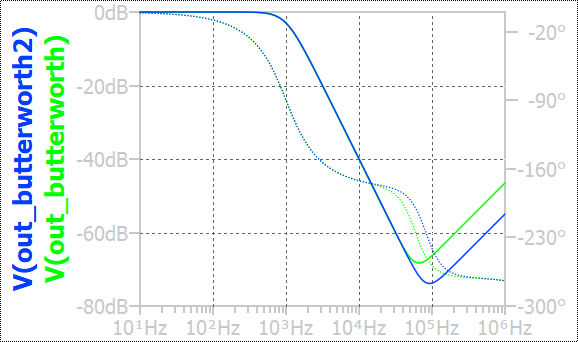

## Bessel filter example

In [7]:
# step 1
fc = 1
fsf = 1.2736
Q = 0.5773
zeta = 1/2/Q

# step 2
print(zeta**2, 4*(Q**2))
C1 = 1
C2 = 1.5 * C1/(zeta**2)
print(C1, C2)

# step 3
R1, R2 = fsolve(butterworth, (0.1, 0.5))
print(R1, R2)

# step 4
fc_target = 1e3
kf = fc/fc_target

km = 10/1e6

C1 = km*kf*C1
C2 = km*kf*C2
R1 = R1/km
R2 = R2/km

print(f'\nR1={R1}\nR2={R2}\nC1={C1}\nC2={C2}')

0.7501306202449032 1.3331011600000002
1 1.9996517400000002
0.0457442092666381 0.17071971313515646

R1=4574.42092666381
R2=17071.971313515645
C1=1e-08
C2=1.9996517400000002e-08


## 3dB Chebysheve filter

In [8]:
# step 1
fc = 1
fsf = 0.8414
Q = 1.3049
zeta = 1/2/Q

# step 2
print(zeta**2, 4*(Q**2))
C1 = 1
C2 = C1/(zeta**2)
print(C1, C2)

# step 3
R1, R2 = fsolve(butterworth, (0.1, 0.05))
print(R1, R2)

# step 4
fc_target = 1e3
kf = fc/fc_target

km = 10/1e6

C1 = km*kf*C1
C2 = km*kf*C2
R1 = R1/km
R2 = R2/km

print(f'\nR1={R1}\nR2={R2}\nC1={C1}\nC2={C2}')

0.1468201104391442 6.8110560399999995
1 6.811056039999999
0.07247870120544668 0.07247869948469064

R1=7247.870120544668
R2=7247.869948469063
C1=1e-08
C2=6.811056039999999e-08


/home/elviseno/miniconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Using spice `.meas` command, the designed filter cutoff frequency could be obtained as below. They all meet design requirements.

```spice
.meas fc_butterworth find frequency when db(v(out_butterworth))=-3 cross=1:
     (   993.476,         0)
.meas fc_butterworth2 find frequency when db(v(out_butterworth))=-3 cross=1:
     (   993.476,         0)
.meas fc_bessel find frequency when db(v(out_bessel))=-3 cross=1:
     (    1003.2,         0)
.meas fc_3dbchebyshev find frequency when db(v(out_3dbchebyshev))=0 cross=last:
     (    1002.8,         0)
```

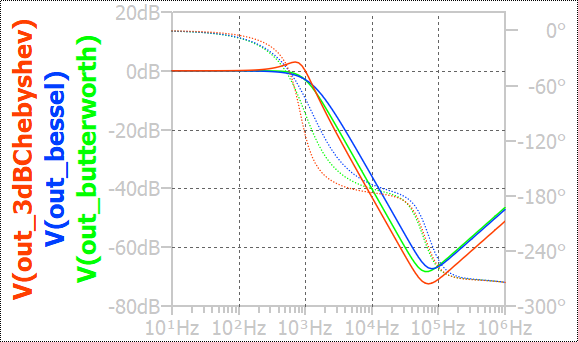

# Second order MFB filter design example

For MFB design, C1 and C2 to be preset with below equations constraint (they are equivalent),
$$\dfrac{C_1}{C_2} \leq \dfrac{\zeta^2}{1-K}$$
$$\dfrac{C_2}{C_1} \geq 4Q^2 (1-K)$$

In [9]:
# step 1
fc = 1
fsf = 1
Q = 0.7071
zeta = 1/2/Q
K = -1 # set unity gain

# step 2
print(zeta**2 / (1-K), 4*(Q**2)*(1-K))
C1 = 1
C2 = 2.5 * C1/(zeta**2) * (1-K)
print(C1, C2)

# step 3
def mfb(p):
  R1, R2, R3 = p
  return (R1*K + R2,
          2 *math.pi*fsf*fc * math.sqrt(R2*R3*C1*C2) - 1,
          Q* 2* math.pi*fsf*fc*C1*(R3 + R2 - K*R3) - 1)

R1, R2, R3 = fsolve(mfb, (0.03, 0.03, 0.15))
print(R1, R2, R3)

# step 4
fc_target = 1e3
kf = fc/fc_target

km = 6.8/1e6

C1 = km*kf*C1
C2 = km*kf*C2
R1 = R1/km
R2 = R2/km
R3 = R3/km

print(f'\nR1={R1}\nR2={R2}\nR3={R3}\nC1={C1}\nC2={C2}')

0.2500047950919699 3.9999232799999995
1 9.999808199999999
0.025367030320742834 0.025367030320742834 0.09985710362897615

R1=3730.4456354033578
R2=3730.4456354033578
R3=14684.868180731786
C1=6.8000000000000005e-09
C2=6.799869576e-08


# References
1. SBOA226 - Single-supply, 2nd-order, Sallen-Key low-pass filter circuit
2. [Sallen-Key Low-pass Filter Design Tool](http://sim.okawa-denshi.jp/en/OPseikiLowkeisan.htm)
3. [Simple Magnitude and Frequency Scaling in Filter Circuits](https://wiraelectrical.com/magnitude-and-frequency-scaling/)
4. [Wiki: Prototype filter](https://en.wikipedia.org/wiki/Prototype_filter)
5. [Wiki: Sallen-key topology](https://en.wikipedia.org/wiki/Sallen%E2%80%93Key_topology)
6. [Wiki: Multi feedback topology](https://en.wikipedia.org/wiki/Electronic_filter_topology#Multiple_feedback_topology)
7. [sloa049d](https://www.ti.com/lit/pdf/sloa049) - Active Low-Pass Filter Design
8. [sloa024b](https://www.ti.com/lit/pdf/sloa024) - Analysis of the Sallen-Key Architecture
9. [SBOA114](https://www.ti.com/lit/SBOA114) - Design Methodology for MFB Filters in ADC Interface Applications